In [1]:
# The following code includes decision tree
# best parameters are identified using grid search with cross validation

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import os
os.chdir("C:\Digital Nest\Decision Trees")
print (os.getcwd())

C:\Digital Nest\Decision Trees


In [2]:
churn = pd.read_csv('Churn.csv')
churn.head()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [3]:
churn.shape

(3333, 21)

In [4]:
# target class ratio
Counter(churn.Churn)

Counter({0: 2850, 1: 483})

In [5]:
2850/(2850+483)

0.8550855085508551

In [6]:
churn.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
       'NightCharge', 'IntlCalls', 'IntlCharge', 'State', 'AreaCode',
       'Phone'], dtype=object)

In [7]:
# check if any NA values
print(churn.isnull().values.any())
print(churn.isnull().sum())

False
AccountLength    0
VMailMessage     0
DayMins          0
EveMins          0
NightMins        0
IntlMins         0
CustServCalls    0
Churn            0
IntlPlan         0
VMailPlan        0
DayCalls         0
DayCharge        0
EveCalls         0
EveCharge        0
NightCalls       0
NightCharge      0
IntlCalls        0
IntlCharge       0
State            0
AreaCode         0
Phone            0
dtype: int64


In [8]:
# split the file into Independent and dependent variables
churnY = pd.DataFrame(churn,columns=["Churn"])
print(churnY.shape)
churnX = churn.copy()
churnX.drop(columns=['Churn','Phone'],axis=1,inplace=True)
print(churnX.shape)

(3333, 1)
(3333, 19)


In [9]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(churnX, churnY, 
                                                    test_size = 0.20, 
                                                    random_state = 0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2666, 19)
(2666, 1)
(667, 19)
(667, 1)


In [10]:
print(Counter(Y_train.Churn))
print(Counter(Y_test.Churn))

Counter({0: 2271, 1: 395})
Counter({0: 579, 1: 88})


In [11]:
print(2271/2666)
print(579/667)

0.8518379594898725
0.8680659670164917


In [12]:
Counter(churn.AreaCode)

Counter({415: 1655, 408: 838, 510: 840})

In [13]:
print(len(np.unique(churn.State)))
print(Counter(churn.State))

51
Counter({'WV': 106, 'MN': 84, 'NY': 83, 'AL': 80, 'OH': 78, 'WI': 78, 'OR': 78, 'VA': 77, 'WY': 77, 'CT': 74, 'ID': 73, 'VT': 73, 'MI': 73, 'TX': 72, 'UT': 72, 'IN': 71, 'KS': 70, 'MD': 70, 'NJ': 68, 'MT': 68, 'NC': 68, 'CO': 66, 'WA': 66, 'NV': 66, 'MA': 65, 'RI': 65, 'MS': 65, 'AZ': 64, 'MO': 63, 'FL': 63, 'NM': 62, 'ME': 62, 'ND': 62, 'OK': 61, 'NE': 61, 'DE': 61, 'SC': 60, 'SD': 60, 'KY': 59, 'IL': 58, 'NH': 56, 'AR': 55, 'GA': 54, 'DC': 54, 'HI': 53, 'TN': 53, 'AK': 52, 'LA': 51, 'PA': 45, 'IA': 44, 'CA': 34})


In [14]:
# lable encoding for strings - state
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.State = le.fit_transform(X_train.State)
X_test.State = le.transform(X_test.State)
print(np.unique(X_train.State))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\pandas\core\generic.py:5292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
X_train.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
       'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
       'IntlCalls', 'IntlCharge', 'State', 'AreaCode'], dtype=object)

In [22]:
X_train.shape

(2666, 19)

In [19]:
print(Y_train.columns.values)

['Churn']


In [22]:
Counter(Y_train.Churn)

Counter({0: 2271, 1: 395})

In [56]:
from imblearn.over_sampling import BorderlineSMOTE
adasyn = BorderlineSMOTE()
#motenc = SMOTENC(categorical_features=[7,8,17,18])
X_resampled, Y_resampled = adasyn.fit_sample(X_train, Y_train.Churn)
print("after smotenc")
print(X_resampled.shape)
print(Y_resampled.shape)

after smotenc
(4542, 19)
(4542,)


In [45]:
Counter(Y_resampled)

Counter({0: 2271, 1: 2297})

In [57]:
# split the data into Categorical and non-categorical
catcols = ['State', 'AreaCode']
X_train_cat = pd.DataFrame(X_resampled, columns=catcols)
print(X_train_cat.shape)
X_train_cont = X_resampled.copy()
X_train_cont.drop(columns=['State', 'AreaCode'],axis=1,inplace=True)
print(X_train_cont.shape)
X_train_cont.reset_index(drop=True,inplace=True)

(4542, 2)
(4542, 17)


In [58]:
# split the data into Categorical and non-categorical
X_test_cat = pd.DataFrame(X_test, columns=catcols)
print(X_test_cat.shape)
X_test_cont = X_test.copy()
#print(X_test_cont.columns)
X_test_cont.drop(columns=['State', 'AreaCode'],axis=1,inplace=True)
print(X_test_cont.shape)
X_test_cont.reset_index(drop=True,inplace=True)

(667, 2)
(667, 17)


In [59]:
# apply one hot encoding on state and area
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse = False, handle_unknown = 'error')
X_train_cat2 = OHE.fit_transform(X_train_cat)
print(X_train_cat2.shape)
X_test_cat2 = OHE.transform(X_test_cat)
print(X_test_cat2.shape)

(4542, 67)
(667, 67)


In [60]:
# convert back array into data frame
X_train_cat3 = pd.DataFrame(X_train_cat2)
print(X_train_cat3.shape)
X_test_cat3 = pd.DataFrame(X_test_cat2)
print(X_test_cat3.shape)

(4542, 67)
(667, 67)


In [61]:
# merge continuous and onehotencoded categorical data
X_train_final = pd.concat([X_train_cont,X_train_cat3],axis=1,join='outer',ignore_index=False)
X_test_final = pd.concat([X_test_cont,X_test_cat3],axis=1,join='outer',ignore_index=False)
print(X_train_final.shape)
print(X_test_final.shape)

(4542, 84)
(667, 84)


In [62]:
X_train_cont.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
       'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
       'IntlCalls', 'IntlCharge'], dtype=object)

In [63]:
X_train_final.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
       'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
       'IntlCalls', 'IntlCharge', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66], dtype=object)

In [64]:
# DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
CART = DecisionTreeClassifier(class_weight='balanced')
# build grid search parameters
#parms = {'max_depth':[2,3,4,5,6,7,8,9,10]} 
#parms = {'min_samples_split': [3,5,8,10,13,15,20]}
#parms = {'min_samples_leaf': [3,5,8,10,13,15,20]}
#parms = {'min_impurity_decrease':[0.01,0.05,0.08,0.10,0.12]}
parms = {'min_samples_split': [10,8,5], 
         'min_samples_leaf': [2,3,5],
         'max_depth':[3,4,5,6],
         'min_impurity_decrease':[0.01,0.05]} 
# grid search
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = CART,param_grid = parms, 
                  scoring = 'f1_macro',
                  cv=3,refit=True,
                  return_train_score = True,verbose=10)
CV.fit(X_train_final,Y_resampled)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=10 
[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=10, score=(train=0.772, test=0.758), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=10 
[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=10, score=(train=0.764, test=0.743), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=10 
[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=10, score=(train=0.785, test=0.769), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=8 
[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=8, score=(train=0.772, test=0.758), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.01

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=8, score=(train=0.764, test=0.743), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=8 
[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=8, score=(train=0.785, test=0.769), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=5 
[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=5, score=(train=0.772, test=0.758), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=5 
[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=5, score=(train=0.764, test=0.743), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=5 
[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=5, score=(train=0.785, test

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=10, score=(train=0.772, test=0.758), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=10 
[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=10, score=(train=0.764, test=0.743), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=10 
[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=10, score=(train=0.785, test=0.769), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=8 
[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=8, score=(train=0.772, test=0.758), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=8 
[CV]  max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=8, score=(train=0.764,

[CV]  max_depth=3, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=10, score=(train=0.743, test=0.725), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=8 
[CV]  max_depth=3, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=8, score=(train=0.333, test=0.333), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=8 
[CV]  max_depth=3, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=8, score=(train=0.720, test=0.712), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=8 
[CV]  max_depth=3, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=8, score=(train=0.743, test=0.725), total=   0.0s
[CV] max_depth=3, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=3, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=5, score=(train=0.333, tes

[CV]  max_depth=4, min_impurity_decrease=0.05, min_samples_leaf=3, min_samples_split=10, score=(train=0.333, test=0.333), total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0.05, min_samples_leaf=3, min_samples_split=10 
[CV]  max_depth=4, min_impurity_decrease=0.05, min_samples_leaf=3, min_samples_split=10, score=(train=0.720, test=0.712), total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0.05, min_samples_leaf=3, min_samples_split=10 
[CV]  max_depth=4, min_impurity_decrease=0.05, min_samples_leaf=3, min_samples_split=10, score=(train=0.743, test=0.725), total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0.05, min_samples_leaf=3, min_samples_split=8 
[CV]  max_depth=4, min_impurity_decrease=0.05, min_samples_leaf=3, min_samples_split=8, score=(train=0.333, test=0.333), total=   0.0s
[CV] max_depth=4, min_impurity_decrease=0.05, min_samples_leaf=3, min_samples_split=8 
[CV]  max_depth=4, min_impurity_decrease=0.05, min_samples_leaf=3, min_samples_split=8, score=(train=0.720,

[CV]  max_depth=5, min_impurity_decrease=0.01, min_samples_leaf=5, min_samples_split=10, score=(train=0.785, test=0.769), total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0.01, min_samples_leaf=5, min_samples_split=8 
[CV]  max_depth=5, min_impurity_decrease=0.01, min_samples_leaf=5, min_samples_split=8, score=(train=0.795, test=0.770), total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0.01, min_samples_leaf=5, min_samples_split=8 
[CV]  max_depth=5, min_impurity_decrease=0.01, min_samples_leaf=5, min_samples_split=8, score=(train=0.798, test=0.772), total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0.01, min_samples_leaf=5, min_samples_split=8 
[CV]  max_depth=5, min_impurity_decrease=0.01, min_samples_leaf=5, min_samples_split=8, score=(train=0.785, test=0.769), total=   0.0s
[CV] max_depth=5, min_impurity_decrease=0.01, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=5, min_impurity_decrease=0.01, min_samples_leaf=5, min_samples_split=5, score=(train=0.795, tes

[CV]  max_depth=6, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=5, score=(train=0.798, test=0.772), total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=5 
[CV]  max_depth=6, min_impurity_decrease=0.01, min_samples_leaf=2, min_samples_split=5, score=(train=0.785, test=0.769), total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=10 
[CV]  max_depth=6, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=10, score=(train=0.805, test=0.775), total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=10 
[CV]  max_depth=6, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=10, score=(train=0.798, test=0.772), total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=10 
[CV]  max_depth=6, min_impurity_decrease=0.01, min_samples_leaf=3, min_samples_split=10, score=(train=0.785

[CV]  max_depth=6, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=10, score=(train=0.333, test=0.333), total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=10 
[CV]  max_depth=6, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=10, score=(train=0.720, test=0.712), total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=10 
[CV]  max_depth=6, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=10, score=(train=0.743, test=0.725), total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=8 
[CV]  max_depth=6, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=8, score=(train=0.333, test=0.333), total=   0.0s
[CV] max_depth=6, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=8 
[CV]  max_depth=6, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=8, score=(train=0.720,

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    7.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'

In [41]:
CVResults = pd.DataFrame(CV.cv_results_)
CVResults.to_excel('CVResutls_CART6.xlsx')

In [36]:
print(CV.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [48]:
X_train_cont.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
       'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
       'IntlCalls', 'IntlCharge'], dtype=object)

In [14]:
print(CV.best_estimator_.feature_importances_)

[0.         0.         0.         0.03994177 0.         0.
 0.34929375 0.23496181 0.07057962 0.         0.30522306 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [65]:
print(CV.best_score_)
print(CV.best_params_)

0.7720565496061161
{'max_depth': 6, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 2, 'min_samples_split': 8}


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


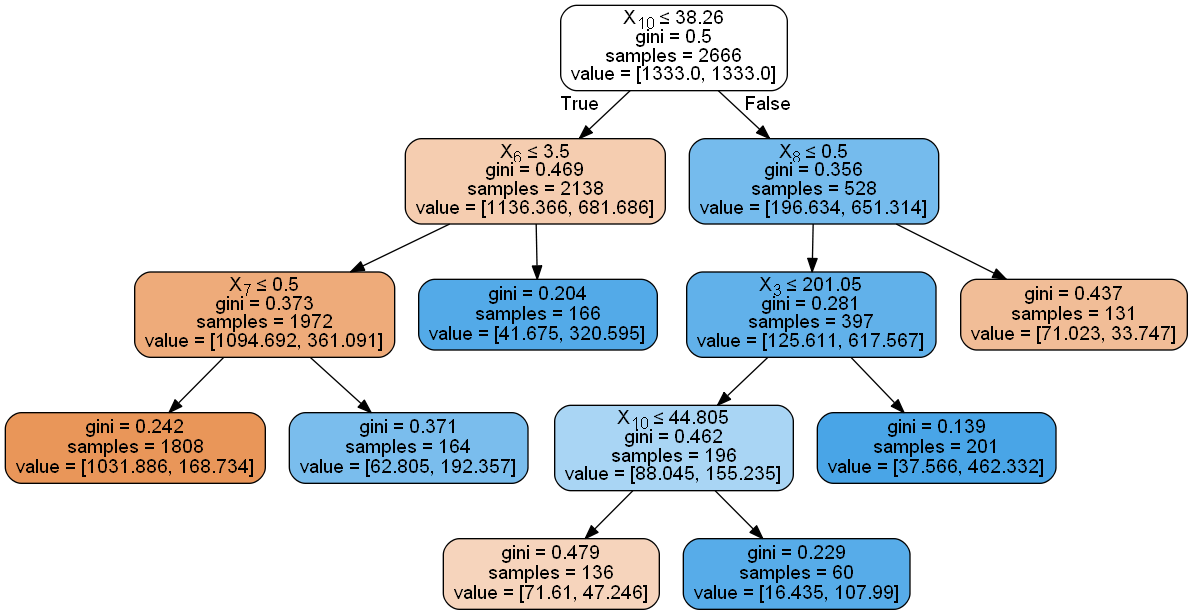

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(CV.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[Text(186.0, 195.696, 'node #0\nDayCharge <= 38.26\ngini = 0.5\nsamples = 2666\nvalue = [1333.0, 1333.0]\nclass = y[0]'),
 Text(111.60000000000001, 152.208, 'node #1\nCustServCalls <= 3.5\ngini = 0.469\nsamples = 2138\nvalue = [1136.366, 681.686]\nclass = y[0]'),
 Text(74.4, 108.72, 'node #2\nIntlPlan <= 0.5\ngini = 0.373\nsamples = 1972\nvalue = [1094.692, 361.091]\nclass = y[0]'),
 Text(37.2, 65.232, 'node #3\ngini = 0.242\nsamples = 1808\nvalue = [1031.886, 168.734]\nclass = y[0]'),
 Text(111.60000000000001, 65.232, 'node #4\ngini = 0.371\nsamples = 164\nvalue = [62.805, 192.357]\nclass = y[1]'),
 Text(148.8, 108.72, 'node #5\ngini = 0.204\nsamples = 166\nvalue = [41.675, 320.595]\nclass = y[1]'),
 Text(260.40000000000003, 152.208, 'node #6\nVMailPlan <= 0.5\ngini = 0.356\nsamples = 528\nvalue = [196.634, 651.314]\nclass = y[1]'),
 Text(223.20000000000002, 108.72, 'node #7\nEveMins <= 201.05\ngini = 0.281\nsamples = 397\nvalue = [125.611, 617.567]\nclass = y[1]'),
 Text(186.0, 65.23

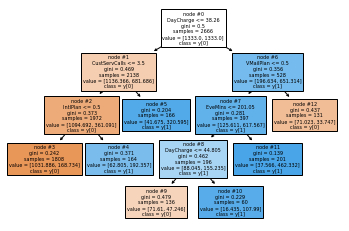

In [20]:
from sklearn import tree
tree.plot_tree(decision_tree = CV.best_estimator_,
               feature_names = X_train_final.columns.values,
               class_names = True,
               filled=True,
               node_ids=True,
               proportion=False)

In [66]:
# Preidct on Test data and check the confusion matrix
predictTest = CV.predict(X_test_final)
print(predictTest[0:5])

[1 0 0 0 1]


In [67]:
predictProb = CV.predict_proba(X_test_final)
print(predictProb[0:5])
PProb = pd.DataFrame(predictProb)

[[0.49356223 0.50643777]
 [0.74692144 0.25307856]
 [0.74692144 0.25307856]
 [0.74692144 0.25307856]
 [0.10337553 0.89662447]]


In [68]:
# generate confusion matrix
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predictTest))
print (classification_report(Y_test,predictTest))

[[466 113]
 [ 15  73]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       579
           1       0.39      0.83      0.53        88

    accuracy                           0.81       667
   macro avg       0.68      0.82      0.71       667
weighted avg       0.89      0.81      0.83       667



In [42]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
# AUC for class 1
AUC = roc_auc_score(Y_test, PProb[1])
print(AUC)
# define variables for True Positive Rate and Falst Positive Rate & threshold value
#TPR = dict()
#FPR = dict()
#THR = dict()
FPR, TPR, THR = roc_curve(Y_test, PProb[1])

0.8407913330193124


In [26]:
print(THR)
print(TPR)
print(FPR)

[1.92485293 0.92485293 0.88496247 0.86791191 0.75386112 0.3975045
 0.32210482 0.14053914]
[0.         0.28409091 0.55681818 0.60227273 0.79545455 0.82954545
 0.84090909 1.        ]
[0.         0.03108808 0.07081174 0.08290155 0.13816926 0.19689119
 0.2642487  1.        ]


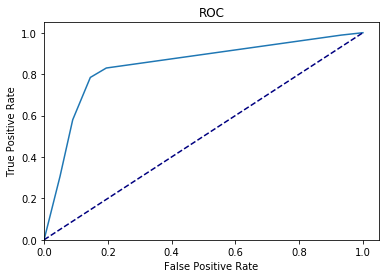

In [43]:
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [28]:
ROC = pd.DataFrame({'THR': THR,
                    'TPR': TPR,
                    'FPR': FPR})
ROC.to_excel("ROC_DT.xlsx",index=False)

In [43]:
predict1 = list()
for prob in PProb[1]:
    if prob >= 0.15:
        predict1.append(1)
    else:
        predict1.append(0)
print(len(predict1))
print(Counter(predict1))

667
Counter({0: 440, 1: 227})


In [44]:
print (confusion_matrix(Y_test,predict1))
print (classification_report(Y_test,predict1))

[[426 153]
 [ 14  74]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       579
           1       0.33      0.84      0.47        88

    accuracy                           0.75       667
   macro avg       0.65      0.79      0.65       667
weighted avg       0.88      0.75      0.79       667

